In [3]:
import numpy as np

class Bandit:
    """
    Multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms.
    reward_means : ndarray
        1D array of `float` mean values for each arm
    reward_stds : ndarray
        1D array of `float` standard deviations for each arm
    optimal_arm : int
        Index of the arm with the highest mean.

    Methods
    -------
    pull_arm(int)
        Pull an arm to receive a randomized reward.
    get_optimal_arm
        Returns index of arm with the highest mean value.
    """
    def __init__(self, num_arms=10, reward_means=None, reward_stds=None):
        self.num_arms = num_arms
        
        # Catalog of Reward Means
        #self.reward_means = np.array(reward_means) or np.random.normal(0, 1, size=num_arms)
        #self.reward_means = np.array(reward_means) if reward_means is not None else np.random.normal(0, 1, size=num_arms)
        self.reward_means = np.random.normal(0, 1, size=num_arms) if reward_means is None else  np.array(reward_means) 
        if len(self.reward_means) != num_arms:
            raise ValueError("Length of reward_means should be equal to num_arms")
        
        # Catalog of Reward Deviations
        self.reward_stds = np.array(reward_stds) or np.ones((num_arms))
        if len(self.reward_stds) != num_arms:
            raise ValueError("Length of reward_stds should be equal to num_arms")

        self.optimal_arm = np.argmax(self.reward_means)


    def pull_arm(self, arm):
        """Receive a reward value from the specified arm's reward distribution"""
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm index")
        reward = np.random.normal(self.reward_means[arm], self.reward_stds[arm])
        return reward
    
    def get_optimal_arm(self):
        return self.optimal_arm

# Problem 8

*Encode a Python implementation of the simple bandit algorithm defined in the pseudocode block on page 32. 
Use your implementation to recreate Figure 2.2 (p.29) by performing tests on the 10-armed testbed, described in the first paragraph of Section 2.3. 
Include your code with your homework submission.*



First, we build bandit test-bed.


In [26]:


k = 10
epsilon = 0.1

def bandit(action):
    return 1

'''
Initialize, for a = 1 to k: 
    Q(a) <- 0 
    N(a) <- 0 
'''
av_estimates = np.zeros(k)
actions = np.zeros(k) 


'''
Loop forever: 
    A <- argmaxa Q(a) with probability 1 - e (breaking ties randomly) 
        a random action with probability e 
    R <- bandit(A) 
    N(A) <- N(A)+1 
    Q(A) <- Q(A)+ 1/N(A) [R - Q(A)]
'''
for _ in range(10):
    action = av_estimates.argmax() if np.random.rand() > epsilon else np.random.randint(k)
    reward = bandit(action)
    
    actions[action] += 1
    av_estimates[action] = (reward-av_estimates[action])/actions[action]


[9. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
bandit = Bandit(num_arms=10)
print("Optimal arm:", bandit.get_optimal_arm())

chosen_arm = 3  # Choose an arm to pull
reward = bandit.pull_arm(chosen_arm)
print("Reward for pulling arm", chosen_arm, ":", reward)

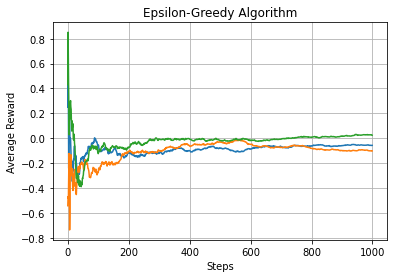

In [6]:
import matplotlib.pyplot as plt

def epsilon_greedy(bandit, epsilon, num_steps):
    q_values = np.zeros(bandit.num_arms)  # Estimated action values
    action_counts = np.zeros(bandit.num_arms)  # Number of times each action was chosen
    rewards = []  # Store rewards obtained at each step
    
    for _ in range(num_steps):
        if np.random.rand() < epsilon:  # Exploration: Choose a random action
            action = np.random.randint(bandit.num_arms)
        else:  # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(q_values)
        
        reward = bandit.pull_arm(action)  # Pull the chosen arm and get reward
        rewards.append(reward)
        
        # Update action values and action counts
        action_counts[action] += 1
        q_values[action] += (1 / action_counts[action]) * (reward - q_values[action])
    
    return rewards

# Parameters
num_arms = 10
num_steps = 1000

# Create bandit with specific reward means for each arm
bandit = Bandit(num_arms=num_arms)

# Run epsilon-greedy algorithm
rewards_0 = epsilon_greedy(bandit, 0, num_steps)
rewards_1 = epsilon_greedy(bandit, 0.1, num_steps)
rewards_01 = epsilon_greedy(bandit, 0.01, num_steps)

# Calculate average reward at each step
avg_rewards_0 = np.cumsum(rewards_0) / np.arange(1, num_steps + 1)
avg_rewards_1 = np.cumsum(rewards_1) / np.arange(1, num_steps + 1)
avg_rewards_01 = np.cumsum(rewards_01) / np.arange(1, num_steps + 1)

# Plot average reward over time
#plt.plot(avg_rewards_0)
#plt.plot(avg_rewards_1)
#plt.plot(avg_rewards_01)
plt.plot(rewards_0)
plt.plot(rewards_1)
plt.plot(rewards_01)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Algorithm")
plt.grid(True)
plt.show()

# Problem 9

*Encode a Python implementation of one of the following algorithms, 
and test it on the 10-armed testbed you created for the previous problem. 
Test different parameter values and comment on your results. 
Use tables and figures as appropriate. 
Include your code with your homework submission.*
- Optimistic greedy
- Upper confidence bound 
- Gradient bandit